# Исследование поведения пользователей мобильного приложения интернет-магазина продуктов питания

Цель исследования: определение направлений доработки мобильного приложения в целях повышения покупательского спроса на продукты питания, приобретаемые через мобильное приложение.

Задачи проекта:

1. Изучение воронки продаж;
2. Исследование А/А/В эксперимента по изменению шрифтов в приложении.

## План проекта

1.  Загрузка и анализ данных 
2.	Предобработка данных 
3.	Анализ информации 
4.	Выводы 

## 1. Загрузка и анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
import datetime 
data = pd.read_csv('/datasets/logs_exp.csv', sep = '\\t', engine='python')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [2]:
print(data.duplicated().sum())# проверка на дубли

413


In [3]:
print(data.isna().sum())# проверка на пропуски

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64


Выводы 

Данные загружены. Выведена информация о данных. Выведены первые 5 значений переменных. В данных нет пропусков, об этом свидетельствует проведенная проверка и количество значений в переменных. В данных есть 413 дубликатов (выполнена проверка), их нужно исключить. Названия переменных нуждаются в переименовании на более краткие. Переменные DeviceIDHash и ExpId нуждаются в изменении типа: из int в object, т.к. в данном случае отражают не числовые характеристики, а качественные.

## 2. Предобработка данных 

In [4]:
data = data.drop_duplicates()# удаление дублей
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
EventName         243713 non-null object
DeviceIDHash      243713 non-null int64
EventTimestamp    243713 non-null int64
ExpId             243713 non-null int64
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


Удаляем дубликаты строк. Проверяем.

In [5]:
data = data.rename({'EventName': 'event', 'DeviceIDHash': 'user_id', 'EventTimestamp': 'event_time',
                    'ExpId': 'group_id'}, axis = 1)
data['user_id'] = data['user_id'].astype(object)
data['group_id'] = data['group_id'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
event         243713 non-null object
user_id       243713 non-null object
event_time    243713 non-null int64
group_id      243713 non-null object
dtypes: int64(1), object(3)
memory usage: 9.3+ MB


Корректируем названия столбцов в таблице на более краткие. Меняем тип данных переменных DeviceIDHash и ExpId. Проверяем.

In [6]:
data['datetime'] = pd.to_datetime(data['event_time'], unit = 's')
data['date'] = data['datetime'].dt.date
data.head()

,event,user_id,event_time,group_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


Добавляем столбец с датой и временем и столбец с датой. Проверяем.

## 3. Изучение и проверка данных

### Сколько всего событий в логе? Сколько всего пользователей в логе? Сколько в среднем событий приходится на пользователя?

In [7]:
event_number = data.shape[0]
user_number = len(data['user_id'].unique())
print('Количество событий в логе:',event_number)
print('Количество пользователей в логе:', user_number)
print('В среднем на 1 пользователя приходится', '{:.1f}'.format(event_number/user_number), 'событий')

Количество событий в логе: 243713
Количество пользователей в логе: 7551
В среднем на 1 пользователя приходится 32.3 событий


Посчитаем количество событий в логе. Их 243713.
Посчитаем количество уникальных пользователей. Их 7551.
В среднем на одного польователя приходится 32,3 события.

### Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Определите, с какого момента данные полные и отбросьте более старые.

In [8]:
print(data['date'].max())
print(data['date'].min())

2019-08-07
2019-07-25


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


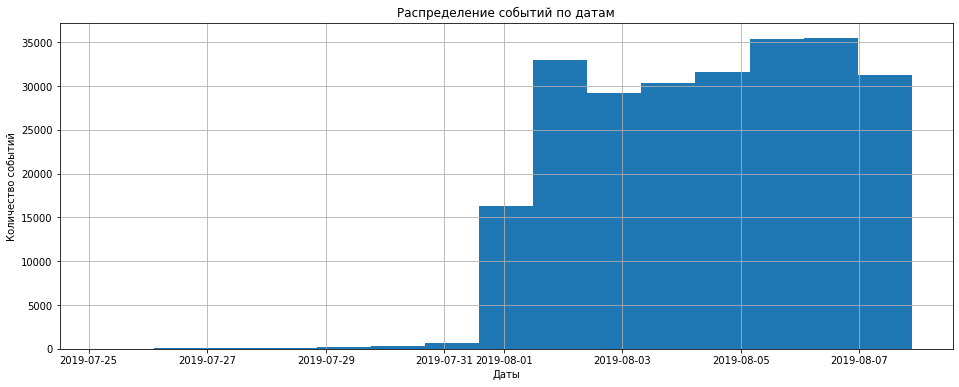

In [9]:
data['datetime'].hist(bins=15, figsize = (16, 6));
plt.title('Распределение событий по датам')
plt.xlabel('Даты')
plt.ylabel('Количество событий');

Определим минимальную и максимальную дату в базе. 
Минимальная дата - 25.07.2019
Максимальная дата 07.08.2019
Построим гистограмму распределения событий по датам. Как видно из графика, событий, произошедших до 01.08.2019 г.,  очень мало. Очевидно, что данные за указанный период по какой-то причине не полные. Нужно их исключить.

In [10]:
data = data[data['datetime']>datetime.datetime(2019, 8, 1)]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 6 columns):
event         240887 non-null object
user_id       240887 non-null object
event_time    240887 non-null int64
group_id      240887 non-null object
datetime      240887 non-null datetime64[ns]
date          240887 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 12.9+ MB


,event,user_id,event_time,group_id,datetime,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


Исключим из базы строки с датами меньше 02.08.2019. Таких строк набралось 2826 шт. (1.15%). Приемлемо.
Таким образом, мы располагаем базой за период с 01.08.2019 по 07.08.2019.

### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [13]:
data_user_group = data.loc[:, ['user_id', 'group_id']]
data_user_group = data_user_group.drop_duplicates() 
group_user = data_user_group.groupby('group_id')['user_id'].count()
print(group_user)
print('Общее количество пользователей во всех группах:', data_user_group['user_id'].count())

group_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64
Общее количество пользователей во всех группах: 7534


Проверим наличие пользователей в экспериментальных группах. Во всех трех группах пользователи есть. 

## 4. Изучение воронки событий

### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64


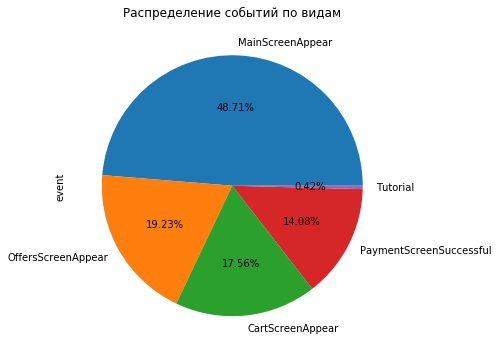

In [14]:
event_types = data['event'].value_counts()
print(event_types)
event_types.plot.pie(figsize = (13, 6), autopct='%1.2f%%', title = 'Распределение событий по видам');

Посчитаем, как часто встречается каждое из событий. Построим график. Чаще всего встречается событие MainScreenAppear - 117,3 тыс. раз, далее следуют OffersScreenAppear - 46,3 тыс. раз, CartScreenAppear - 42,3 тыс. раз, PaymentScreenSuccessful - 33,9 тыс. раз и Tutorial - 1 тыс. раз.

### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие. Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

In [15]:
event_user_data = data.loc[:, ['event', 'user_id']]
event_user_data = event_user_data.drop_duplicates() 
event_user = event_user_data.groupby('event')['user_id'].count()
event_user

event
CartScreenAppear           3734
MainScreenAppear           7419
OffersScreenAppear         4593
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

In [16]:
event_user = event_user.reset_index().sort_values(by='user_id', ascending = False)
event_user['share'] = round(event_user['user_id'] / 7534*100, 1)
event_user

,event,user_id,share
1,MainScreenAppear,7419,98.5
2,OffersScreenAppear,4593,61.0
0,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0
4,Tutorial,840,11.1


Рассчитаем сколько пользователей совершали каждое событие. Посчитаем долю пользоватейлей, совершивших каждое событие. 
Мы получили следующую картину:
Посетили главный экран приложения - 98,5%;
Посетили экран заказа конкретного товара - 61%;
Посетили экран заполнения реквизитов платежной карты - 49,6%;
Оплатили  товар - 47%;
Посетили экран обучения работе с приложением - 11,1%.
Очевидно, что стандартное (желаемое) поведение потребителя в приложении описывается следующим алгоритмом действий:
1. посещение главного экрана;
2. заказ товара;
3. ввод реквизитов карты на соответствующем экране;
4. осуществление оплаты.
Мы имеем классическую воронку событий. Сюда не вписывается обучение работе с приложением.

### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [17]:
event_user = event_user.reset_index(drop=True)
for i in range(3):
    event_user.loc[i+1, 'share_shift'] = round(event_user.loc[i+1,'user_id'] / event_user.loc[i, 'user_id']*100, 1)
event_user   

,event,user_id,share,share_shift
0,MainScreenAppear,7419,98.5,NaN
1,OffersScreenAppear,4593,61.0,61.9
2,CartScreenAppear,3734,49.6,81.3
3,PaymentScreenSuccessful,3539,47.0,94.8
4,Tutorial,840,11.1,NaN


Рассчитаем доли количества пользователей, переходящих на разные этапы воронки:
На экран заказа товара переходит 61,9% пользователей, посетивших главный экран приложения.
На экран ввода реквизитов карты переходят 81,3% пользователей, посетивших экран заказа товара.
Оплачивают заказ 94,8% пользователей, посетивших экран реквизитов карты.

### На каком шаге теряете больше всего пользователей? Какая доля пользователей доходит от первого события до оплаты?

In [18]:
for i in range(3):
    event_user.loc[i+1, 'share_diff'] = event_user.loc[i+1,'user_id'] - event_user.loc[i, 'user_id']
event_user 

,event,user_id,share,share_shift,share_diff
0,MainScreenAppear,7419,98.5,NaN,NaN
1,OffersScreenAppear,4593,61.0,61.9,-2826.0
2,CartScreenAppear,3734,49.6,81.3,-859.0
3,PaymentScreenSuccessful,3539,47.0,94.8,-195.0
4,Tutorial,840,11.1,NaN,NaN


In [17]:
print('От открытия приложения до оплаты доходит', 
      '{:.1%}'.format(event_user.loc[3,'user_id'] / event_user.loc[0, 'user_id']), 'пользователей')

От открытия приложения до оплаты доходит 47.7% пользователей


Рассчитаем потери пользователей на каждом шаге (переход поользователей с одного со бытия на другое).
Наибольшие потери пользователей наблюдаются на этапе перехода с главной страницы приложения на страницу заказа товара (-2826 чел.). Видимо, на главной странице есть содержимое, которое затрудняет переход на страницу заказа или отталкивает часть пользователей от заказа товара.
От открытия приложения до оплаты доходит 47.7% пользователей. 

## 5. Изучение результатов эксперимента

### Сколько пользователей в каждой экспериментальной группе?

group_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


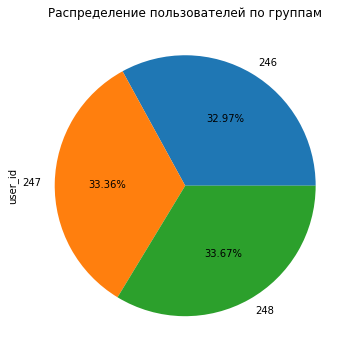

In [19]:
print(group_user)
group_user.plot.pie(figsize = (13, 6), autopct='%1.2f%%', title = 'Распределение пользователей по группам');

In [20]:
group_user = group_user.reset_index()
print('Различие в численности групп А1 и А2 составляет:', round((group_user['user_id'][1]-group_user['user_id'][0])/group_user['user_id'][1]*100, 2))
print('Различие в численности групп А1 и B составляет:', round((group_user['user_id'][2]-group_user['user_id'][0])/group_user['user_id'][2]*100, 2))
print('Различие в численности групп А2 и B составляет:', round((group_user['user_id'][2]-group_user['user_id'][1])/group_user['user_id'][2]*100, 2))

Различие в численности групп А1 и А2 составляет: 1.15
Различие в численности групп А1 и B составляет: 2.09
Различие в численности групп А2 и B составляет: 0.95


Выведем количество пользователей в каждой группе. Как видно, по количеству пользователей группы практически равны. Отклонение по количеству пользователей самой многочисленной группы от самой малочисленной составляет 2,1%. В долях от общей совокупности максимальное отклонение составляет 0,6%. 

### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

In [21]:
users_in_groups = data_user_group.groupby('user_id')['group_id'].count().reset_index()
wrong_users = users_in_groups[users_in_groups['group_id']>1]
wrong_users

,user_id,group_id


Проверим, нет ли пользователей, которые есть сразу в нескольких группах. Таковых не оказалось. Отклонения в количестве пользователей в группе также незначительные. Можем применять А/А и А/В тесты.

### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [22]:
group_A1 = data[data['group_id']==246][['event', 'user_id', 'group_id']]
group_A2 = data[data['group_id']==247][['event', 'user_id', 'group_id']]
group_B = data[data['group_id']==248][['event', 'user_id', 'group_id']]
print(group_A1.head())
print(group_A2.head())
print(group_B.head())

                   event              user_id group_id
2828            Tutorial  3737462046622621720      246
2829    MainScreenAppear  3737462046622621720      246
2830    MainScreenAppear  3737462046622621720      246
2831  OffersScreenAppear  3737462046622621720      246
2834  OffersScreenAppear  3737462046622621720      246
                   event              user_id group_id
2832    MainScreenAppear  1433840883824088890      247
2833    MainScreenAppear  4899590676214355127      247
2838    MainScreenAppear  4899590676214355127      247
2839  OffersScreenAppear  4899590676214355127      247
2843  OffersScreenAppear  4899590676214355127      247
                        event              user_id group_id
2844         MainScreenAppear  4613461174774205834      248
2845         MainScreenAppear  4613461174774205834      248
2846         CartScreenAppear  4613461174774205834      248
2847  PaymentScreenSuccessful  4613461174774205834      248
2848       OffersScreenAppear  461346117

Выделим группы А1, А2 и В.

In [23]:
group_A1 = group_A1.drop_duplicates() 
count_A1 = len(group_A1['user_id'].unique())
print('Количество пользователей в группе А1:', count_A1)
event_user_A1 = group_A1.groupby('event')['user_id'].count().reset_index().sort_values(by='user_id', ascending = False)
event_user_A1 = event_user_A1.reset_index(drop = True)
event_user_A1.columns = ['event', 'group_A1']
event_user_A1

Количество пользователей в группе А1: 2484


,event,group_A1
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200
4,Tutorial,278


In [24]:
group_A2 = group_A2.drop_duplicates() 
count_A2 = len(group_A2['user_id'].unique())
print('Количество пользователей в группе А2:', count_A2)
event_user_A2 = group_A2.groupby('event')['user_id'].count().reset_index().sort_values(by='user_id', ascending = False)
event_user_A2 = event_user_A2.reset_index(drop = True)
event_user_A2.columns = ['event', 'group_A2']
event_user_A2

Количество пользователей в группе А2: 2513


,event,group_A2
0,MainScreenAppear,2476
1,OffersScreenAppear,1520
2,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158
4,Tutorial,283


In [25]:
group_B = group_B.drop_duplicates() 
count_B = len(group_B['user_id'].unique())
print('Количество пользователей в группе B:', count_B)
event_user_B = group_B.groupby('event')['user_id'].count().reset_index().sort_values(by='user_id', ascending = False)
event_user_B = event_user_B.reset_index(drop = True)
event_user_B.columns = ['event', 'group_B']
event_user_B

Количество пользователей в группе B: 2537


,event,group_B
0,MainScreenAppear,2493
1,OffersScreenAppear,1531
2,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181
4,Tutorial,279


Рассчитаем количества пользователей, совершавших события по всем группам.

In [26]:
groups = event_user_A1.merge(event_user_A2, on = 'event').merge(event_user_B, on='event')
groups

,event,group_A1,group_A2,group_B
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [27]:
alpha = 0.01
def test_eq_shares(s1, t1, s2, t2):
    p1 = s1/t1 # пропорция конверсий в первой группе
    p2 = s2/t2 # пропорция конверсий во второй группе
    print('p1 =', p1)
    print('p2 =', p2)
    p_combined = (s1 + s2) / (t1 + t2)# пропорция конверсий в комбинированном датасете
    difference = p1 - p2 # разница пропорций в датасетах
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/t1 + 1/t2))
    distr = st.norm(0, 1) # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    print('Уровень значимости равен', alpha) 
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Учитывая, что нам много раз придется проверять гипотезы о равенстве долей, создаем функцию проверки гипотезы.

#### Нулевая гипотеза для всех нижеприведенных случаев: доли пользователей, совершивших нижеуказанное событие, в группах А1 и А2 равны.

In [28]:
print('Событие: MainScreenAppear')
test_eq_shares(groups.loc[0, 'group_A1'], count_A1, groups.loc[0, 'group_A2'], count_A2)

Событие: MainScreenAppear
p1 = 0.9863123993558777
p2 = 0.9852765618782332
p-значение:  0.7570597232046099
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Проверяем нулевую гипотезу о равенстве долей пользователей, совершивших событие MainScreenAppear, в группах А1 и А2. 
Как видно, отвергнуть гипотезу не получилось. Вероятно, доли равны.

In [29]:
for i in range(4):
    print('Событие:', groups.loc[i+1, 'event'])
    test_eq_shares(groups.loc[i+1, 'group_A1'], count_A1, groups.loc[i+1, 'group_A2'], count_A2)
    print('')

Событие: OffersScreenAppear
p1 = 0.6207729468599034
p2 = 0.6048547552725826
p-значение:  0.2480954578522181
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p1 = 0.5096618357487923
p2 = 0.4926382809391166
p-значение:  0.22883372237997213
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p1 = 0.4830917874396135
p2 = 0.46080382013529647
p-значение:  0.11456679313141849
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: Tutorial
p1 = 0.11191626409017713
p2 = 0.11261440509351373
p-значение:  0.9376996189257114
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Аналогично проверяем нулевые гипотезы о равенстве долей пользователей, совершивших остальные события.
Все гипотезы отвергнуть не получилось. Можно сделать вывод о том, что группы А1 и А2 идентичны. Разбиение на группы было корректным.

### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

#### Нулевая гипотеза для всех нижеприведенных случаев: доли пользователей, совершивших нижеуказанное событие, в группах А1 и B равны.

In [30]:
for i in range(5):
    print('Событие:', groups.loc[i, 'event'])
    test_eq_shares(groups.loc[i, 'group_A1'], count_A1, groups.loc[i, 'group_B'], count_B)
    print('')

Событие: MainScreenAppear
p1 = 0.9863123993558777
p2 = 0.9826566811194324
p-значение:  0.2949721933554552
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p1 = 0.6207729468599034
p2 = 0.6034686637761135
p-значение:  0.20836205402738917
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p1 = 0.5096618357487923
p2 = 0.48482459597950334
p-значение:  0.07842923237520116
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p1 = 0.4830917874396135
p2 = 0.46551044540796216
p-значение:  0.2122553275697796
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: Tutorial
p1 = 0.11191626409017713
p2 = 0.10997240835632636
p-значение:  0.8264294010087645
Уровень значимости равен 0.

Как и в случае А/А теста, сравнение долей пользователей групп А1 и В, совершивших события,  показало, что статистически значимых отличий между группами А1 и В нет.

In [31]:
for i in range(5):
    print('Событие:', groups.loc[i, 'event'])
    test_eq_shares(groups.loc[i, 'group_A2'], count_A2, groups.loc[i, 'group_B'], count_B)
    print('')

Событие: MainScreenAppear
p1 = 0.9852765618782332
p2 = 0.9826566811194324
p-значение:  0.4587053616621515
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p1 = 0.6048547552725826
p2 = 0.6034686637761135
p-значение:  0.9197817830592261
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p1 = 0.4926382809391166
p2 = 0.48482459597950334
p-значение:  0.5786197879539783
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p1 = 0.46080382013529647
p2 = 0.46551044540796216
p-значение:  0.7373415053803964
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: Tutorial
p1 = 0.11261440509351373
p2 = 0.10997240835632636
p-значение:  0.765323922474501
Уровень значимости равен 0.01

Как и в ранее рассмотренных случаях, сравнение долей пользователей групп А2 и В, совершивших события, показало, что группы А2 и В идентичны.

In [32]:
count_A = count_A1 + count_A2
print('Общее количество пользователей в группах А1 и А2:', count_A)
groups['group_A'] = groups['group_A1'] + groups['group_A2']
groups

Общее количество пользователей в группах А1 и А2: 4997


,event,group_A1,group_A2,group_B,group_A
0,MainScreenAppear,2450,2476,2493,4926
1,OffersScreenAppear,1542,1520,1531,3062
2,CartScreenAppear,1266,1238,1230,2504
3,PaymentScreenSuccessful,1200,1158,1181,2358
4,Tutorial,278,283,279,561


In [33]:
for i in range(5):
    print('Событие:', groups.loc[i, 'event'])
    test_eq_shares(groups.loc[i, 'group_A'], count_A, groups.loc[i, 'group_B'], count_B)
    print('')

Событие: MainScreenAppear
p1 = 0.9857914748849309
p2 = 0.9826566811194324
p-значение:  0.29424526837179577
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p1 = 0.6127676605963578
p2 = 0.6034686637761135
p-значение:  0.43425549655188256
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p1 = 0.5011006603962378
p2 = 0.48482459597950334
p-значение:  0.18175875284404386
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p1 = 0.47188312987792674
p2 = 0.46551044540796216
p-значение:  0.6004294282308704
Уровень значимости равен 0.01
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: Tutorial
p1 = 0.11226736041624975
p2 = 0.10997240835632636
p-значение:  0.764862472531507
Уровень значимости равен 0

Объединим группы А1 и А2 в общую группу А. Проведем сравнение долей пользователей групп А и В.
Результаты те же. Группы А и В идентичны. Менеджеры зря пугались, пользователей новыми шрифтами не оттолкнешь, нужно что-то посерьезнее :).

### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

Уровень значимости изначально выбрал 0,05, но потом снизил его до 0,01. 1% риска ошибки - приемлемый риск.
Выводы не изменились.
В ходе исследования было сделано 20 проверок статистических гипотез.

## Выводы

1.	Пользователи при взаимодействии с мобильным приложением образуют воронку событий. На каждый следующий этап переходит меньше пользователей, чем было на предыдущем.
2.	Воронка событий имеет следующие этапы: 
	посещение главного экрана;
	заказ товара;
	ввод реквизитов карты на соответствующем экране;
	осуществление оплаты.
3.	Наибольшие потери пользователей происходят при переходе на этап OffersScreenAppear (заказ товара).
4.	До этапа оплаты доходят 47% пользователей приложения или 47,7% от количества пользователей, посетивших главный экран приложения.
5.	А/А тест показал, что группы А1 и А2 идентичны. Разбиение на группы было корректным.
6.	А/В тест показал, что группы А и В также идентичны, т.е. для пользователей не имеет значения, какой шрифт используется.